# Financial 3 Semester project (Comparing specific ETF's during various Natural Disasters)

## Nick Zesses, Hunter Vainik, Alli Weems, Maneesh Malpeddi

In [156]:
#import necessary modules and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import random
import time
import sklearn as skl
import matplotlib.dates as mdates
import datetime as dt

### Natural Disaster Classes:
    - Tornado
    - Hurricane
    - Snowstorm

In [154]:
class tornado_dis:
    """ Tornado Natural Disasters class.

    Attributes
    ----------
    industry_name: str
        industry affected: 
        'Pharmaceutical',
        'Real Estate',
        'Energy',
        'Materials',
        'Entertainment',
        'Healthcare',
        'Manufacturing',
        'Mining',
        'Tech',
        'Agriculture',
        'Automotive',
        'Telecommunications'
        
        
    natural_disaster: str
        type of disaster:
        For this class--> 'Tornado'

    Methods
    -------
    data():
        Stores necessary ETF stock open and date data; stores necessary natural disaster.
        
    etf_affected():
        Prints the three ETF's for the industry that will be plotted.

    corr():
        Calculates percent change for industry and natural disaster as input into class.
        
    plot():
        Plot the stock open ober time with axvlines at various dates (5) when there were tornadoes.

    """
    dates = None
    natural_disaster = None
    etf = None
    industry = None
    
    
    def __init__(self, industry_name, natural_disaster_type):
        self.industry_name = industry_name
        self.natural_disaster_type = natural_disaster_type
        
        """Read in ETF'S.

        Data from Yahoo Finance
        ----------
        list_etfs: Pathspace to data in list form
            
        data: assign each to proper ETF name
        
        natural_dis: Data from natural disasters masked to be tornado

        """
        list_etfs = ['Pharma/IHE.csv', 'Pharma/PJP.csv', 'Pharma/PPH.csv', 
             'Real Estate/IYR.csv', 'Real Estate/SCHH.csv', 'Real Estate/VNQ.csv',
             'Energy/OILU.csv', 'Energy/GUSH.csv', 'Energy/VDE.csv',
             'Materials/IYM.csv', 'Materials/VAW.csv', 'Materials/XLB.csv', 'Materials/MXI.csv',
             'Entertainment/PBS.csv', 'Entertainment/PEJ.csv', 'Entertainment/VOX.csv',
             'Healthcare/IBB.csv', 'Healthcare/VHT.csv', 'Healthcare/XLV.csv',
             'Manufacturing/EXI (9-28-2006).csv', 'Manufacturing/VIS (9-30-2004).csv', 'Manufacturing/XLI (12-28-1998).csv',
             'Mining/PICK.csv', 'Mining/REMX.csv','Mining/XME.csv',
             'Tech/RYT.csv', 'Tech/VGT.csv', 'Tech/XSW.csv',
             'Agriculture/DBA.csv', 'Agriculture/RJA.csv', 'Agriculture/TAGS.csv',
             'Automotive/CARZ.csv', 'Automotive/DRIV.csv', 'Automotive/VCAR.csv',
             'Telecommunications/IYZ.csv', 'Telecommunications/NXTG.csv', 'Telecommunications/VOX.csv']
        
        data = []

        for file in list_etfs:
            df = pd.read_csv(file, delimiter = ',')
            data.append(df)
    
        IHE, PJP, PPH, IYR, SCHH, VNQ, OILU, GUSH, VDE, IYM, VAW, XLB, MXI, PBS, PEJ, VOX, IBB, VHT, XLV, EXI, VIS, XLI, PICK, REMX, XME, RYT, VGT, XSW, DBA, RJA, TAGS,CARZ, DRIV, VCAR, IYZ, NXTG, VOX = data

        #industry
        self.pharma = [IHE, PJP, PPH]
        self.real_estate = [IYR, SCHH, VNQ]
        self.energy = [OILU, GUSH, VDE]
        self.materials = [IYM, VAW, XLB, MXI]
        self.entertainment = [PBS, PEJ, VOX]
        self.healthcare = [IBB, VHT, XLV]
        self.manufacturing = [EXI, VIS, XLI]
        self.mining = [PICK, REMX, XME]
        self.tech = [RYT, VGT, XSW]
        self.agriculture = [DBA, RJA, TAGS]
        self.automotive = [CARZ, DRIV, VCAR]
        self.telecommunications = [IYZ, NXTG, VOX]
        
        pharma = [IHE, PJP, PPH]
        real_estate = [IYR, SCHH, VNQ]
        energy = [OILU, GUSH, VDE]
        materials = [IYM, VAW, XLB, MXI]
        entertainment = [PBS, PEJ, VOX]
        healthcare = [IBB, VHT, XLV]
        manufacturing = [EXI, VIS, XLI]
        mining = [PICK, REMX, XME]
        tech = [RYT, VGT, XSW]
        agriculture = [DBA, RJA, TAGS]
        automotive = [CARZ, DRIV, VCAR]
        telecommunications = [IYZ, NXTG, VOX]
        
        #natural disaster data
        natural_dis = pd.read_csv('Disaster List.csv')

        #tornado data
        self.tornado = natural_dis[natural_dis['Disaster Type']=='Tornado']

    def data(self):
        """Saves industry name and corresponding ETF data to be called later in plot()"""

        if self.industry_name == 'Pharmaceutical':
            self.industry = self.pharma
            self.etf = ['IHE', 'PJP', 'PPH']
        elif self.industry_name == 'Real Estate':
            self.industry = self.real_estate
            self.etf = ['IYR', 'SCHH', 'VNQ']
        elif self.industry_name == 'Energy':
            self.industry = self.energy
            self.etf = ['OILU', 'GUSH', 'VDE']
        elif self.industry_name == 'Materials':
            self.industry = self.materials
            self.etf = ['IYM', 'VAW', 'XLB', 'MXI']
        elif self.industry_name == 'Entertainment':
            self.industry = self.entertainment
            self.etf = ['PBS', 'PEJ', 'VOX']
        elif self.industry_name == 'Healthcare':
            self.industry = self.healthcare
            self.etf = ['IBB', 'VHT', 'XLV']
        elif self.industry_name == 'Manufacturing':
            self.industry = self.manufacturing
            self.etf = ['EXI', 'VIS', 'XLI']
        elif self.industry_name == 'Mining':
            self.industry = self.mining
            self.etf = ['PICK', 'REMX', 'XME']
        elif self.industry_name == 'Tech':
            self.industry = self.tech
            self.etf = ['RYT', 'VGT', 'XSW']
        elif self.industry_name == 'Agriculture':
            self.industry = self.agriculture
            self.etf = ['DBA', 'RJA', 'TAGS']
        elif self.industry_name == 'Automotive':
            self.industry = self.automotive
            self.etf = ['CARZ', 'DRIV', 'VCAR']
        elif self.industry_name == 'Telecommunications':
            self.industry = self.telecommunications
            self.etf = ['IYZ', 'NXTG', 'VOX']
    
        if self.natural_disaster_type == 'Tornado':
            self.natural_disaster = self.tornado
            self.dates = self.natural_disaster['Start']

    def etf_affected(self):
        """Prints the ETF's that will be plotted for the input industry"""
        
        print(self.etf)
          
    def corr(self):
        """Creates a correlation matrix between the input industry and every tornado in the tornado data,
        calculates average percent change for those days that disasters occured. Then, the average percentage 
        change on days with the natural disaster is compared to the average percentage change on all days of 
        the ETF data."""
        
        for etf in self.industry:
            df1 = self.natural_disaster.merge(etf[["Date","Open","Close"]],left_on = "Start",right_on = "Date")
            df2 = etf.merge(self.natural_disaster[["Start"]],left_on = "Date",right_on = "Start")
            pct = (df1["Close"]-df1["Open"])/df1["Open"]
            df2.dropna()
            df2["% change"] = pct
            pct1 = (etf["Close"]-etf["Open"])/etf["Open"]
            etf.dropna()
            etf["% change"] = pct1
            nmean = np.mean(df2["% change"])
            totmean = np.mean(etf["% change"])
            print(f" Looking at the {self.industry_name} industry and how it is affected by the natural disaster: {self.natural_disaster_type} ,we analyzed",len(df2["% change"]),"points") 
            print(f" where there was an average percentage change of {nmean} compared to the standard industry average of {totmean}")
            return(df2.corr())
        
    def plot(self):
        """Subsets the tornado data, so that it is just the date of the tornado, datetime strips this
        date so that it can be plot with the stock data and plots these 5 tornadoes as axvlines.
        
        Goes through the input industry and plots the stock open over time for each ETF in the industry.
        
        Plots axvlines at the various tornado dates."""
            
        axv = []
        for dis in self.dates:
            axv.append([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in self.dates.iloc[:]])
        
        axv0 = axv[0]
        
        if self.natural_disaster_type == 'Tornado':
            for etf in self.industry:
                x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in etf.iloc[:,0]]
                plt.plot(x, etf['Open'], label = self.etf)
                plt.xlabel('Date')
                plt.ylabel('Stock Open')
                plt.title(f"{self.industry_name} plotted during {self.natural_disaster_type}")
                plt.axvline(axv0[20], c = 'black')
                plt.axvline(axv0[5], c = 'black')
                plt.axvline(axv0[10], c = 'black')
                plt.axvline(axv0[18], c= 'black')
                plt.axvline(axv0[14], c='black')

In [155]:
class hurricane_dis:
    """ Hurricane Natural Disasters class.

    Attributes
    ----------
    industry_name: str
        industry affected: 
        'Pharmaceutical',
        'Real Estate',
        'Energy',
        'Materials',
        'Entertainment',
        'Healthcare',
        'Manufacturing',
        'Mining',
        'Tech',
        'Agriculture',
        'Automotive',
        'Telecommunications'
              
    natural_disaster: str
        type of disaster:
        For this class--> 'Hurricane'

    Methods
    -------
    data():
        Stores necessary ETF stock open and date data; stores necessary natural disaster data.
        
    etf_affected():
        Prints the three ETF's for the input industry that will be plotted.

    corr():
        Calculates percent change for industry and natural disaster as input into class.
        
    plot():
        Plot the stock open ober time with axvlines at various dates (5) when there were hurricanes.

    """

    dates = None
    natural_disaster = None
    etf = None
    industry = None
    
    
    def __init__(self, industry_name, natural_disaster_type):
        self.industry_name = industry_name
        self.natural_disaster_type = natural_disaster_type
        
        """Read in ETF'S.

        Data from Yahoo Finance
        ----------
        list_etfs: Pathspace to all of the ETF data in list form
            
        data: assign each to proper ETF name
        
        natural_dis: Data from natural disasters masked to be hurricane

        """
        list_etfs = ['Pharma/IHE.csv', 'Pharma/PJP.csv', 'Pharma/PPH.csv', 
             'Real Estate/IYR.csv', 'Real Estate/SCHH.csv', 'Real Estate/VNQ.csv',
             'Energy/OILU.csv', 'Energy/GUSH.csv', 'Energy/VDE.csv',
             'Materials/IYM.csv', 'Materials/VAW.csv', 'Materials/XLB.csv', 'Materials/MXI.csv',
             'Entertainment/PBS.csv', 'Entertainment/PEJ.csv', 'Entertainment/VOX.csv',
             'Healthcare/IBB.csv', 'Healthcare/VHT.csv', 'Healthcare/XLV.csv',
             'Manufacturing/EXI (9-28-2006).csv', 'Manufacturing/VIS (9-30-2004).csv', 'Manufacturing/XLI (12-28-1998).csv',
             'Mining/PICK.csv', 'Mining/REMX.csv','Mining/XME.csv',
             'Tech/RYT.csv', 'Tech/VGT.csv', 'Tech/XSW.csv',
             'Agriculture/DBA.csv', 'Agriculture/RJA.csv', 'Agriculture/TAGS.csv',
             'Automotive/CARZ.csv', 'Automotive/DRIV.csv', 'Automotive/VCAR.csv',
             'Telecommunications/IYZ.csv', 'Telecommunications/NXTG.csv', 'Telecommunications/VOX.csv']
        
        data = []

        for file in list_etfs:
            df = pd.read_csv(file, delimiter = ',')
            data.append(df)
    
        IHE, PJP, PPH, IYR, SCHH, VNQ, OILU, GUSH, VDE, IYM, VAW, XLB, MXI, PBS, PEJ, VOX, IBB, VHT, XLV, EXI, VIS, XLI, PICK, REMX, XME, RYT, VGT, XSW, DBA, RJA, TAGS,CARZ, DRIV, VCAR, IYZ, NXTG, VOX = data
        
        #industry
        self.pharma = [IHE, PJP, PPH]
        self.real_estate = [IYR, SCHH, VNQ]
        self.energy = [OILU, GUSH, VDE]
        self.materials = [IYM, VAW, XLB, MXI]
        self.entertainment = [PBS, PEJ, VOX]
        self.healthcare = [IBB, VHT, XLV]
        self.manufacturing = [EXI, VIS, XLI]
        self.mining = [PICK, REMX, XME]
        self.tech = [RYT, VGT, XSW]
        self.agriculture = [DBA, RJA, TAGS]
        self.automotive = [CARZ, DRIV, VCAR]
        self.telecommunications = [IYZ, NXTG, VOX]
        
        pharma = [IHE, PJP, PPH]
        real_estate = [IYR, SCHH, VNQ]
        energy = [OILU, GUSH, VDE]
        materials = [IYM, VAW, XLB, MXI]
        entertainment = [PBS, PEJ, VOX]
        healthcare = [IBB, VHT, XLV]
        manufacturing = [EXI, VIS, XLI]
        mining = [PICK, REMX, XME]
        tech = [RYT, VGT, XSW]
        agriculture = [DBA, RJA, TAGS]
        automotive = [CARZ, DRIV, VCAR]
        telecommunications = [IYZ, NXTG, VOX]
        
        #natural disaster data
        natural_dis = pd.read_csv('Disaster List.csv')

        #hurricane data
        self.hurricane = natural_dis[natural_dis['Disaster Type']=='Hurricane']
    
    
    def data(self):
        """Saves industry name and corresponding ETF data to be called later in plot()"""
        
        if self.industry_name == 'Pharmaceutical':
            self.industry = self.pharma
            self.etf = ['IHE', 'PJP', 'PPH']
        elif self.industry_name == 'Real Estate':
            self.industry = self.real_estate
            self.etf = ['IYR', 'SCHH', 'VNQ']
        elif self.industry_name == 'Energy':
            self.industry = self.energy
            self.etf = ['OILU', 'GUSH', 'VDE']
        elif self.industry_name == 'Materials':
            self.industry = self.materials
            self.etf = ['IYM', 'VAW', 'XLB', 'MXI']
        elif self.industry_name == 'Entertainment':
            self.industry = self.entertainment
            self.etf = ['PBS', 'PEJ', 'VOX']
        elif self.industry_name == 'Healthcare':
            self.industry = self.healthcare
            self.etf = ['IBB', 'VHT', 'XLV']
        elif self.industry_name == 'Manufacturing':
            self.industry = self.manufacturing
            self.etf = ['EXI', 'VIS', 'XLI']
        elif self.industry_name == 'Mining':
            self.industry = self.mining
            self.etf = ['PICK', 'REMX', 'XME']
        elif self.industry_name == 'Tech':
            self.industry = self.tech
            self.etf = ['RYT', 'VGT', 'XSW']
        elif self.industry_name == 'Agriculture':
            self.industry = self.agriculture
            self.etf = ['DBA', 'RJA', 'TAGS']
        elif self.industry_name == 'Automotive':
            self.industry = self.automotive
            self.etf = ['CARZ', 'DRIV', 'VCAR']
        elif self.industry_name == 'Telecommunications':
            self.industry = self.telecommunications
            self.etf = ['IYZ', 'NXTG', 'VOX']
        if self.natural_disaster_type == 'Hurricane':
            self.natural_disaster = self.hurricane
            self.dates = self.natural_disaster['Start']
            
    def etf_affected(self):
        """Prints the ETF's that will be plotted for the input industry"""
        
        print(self.etf)

    def corr(self):
        """Creates a correlation matrix between the input industry and every hurricane in the hurricane data,
        calculates average percent change for those days that disasters occured. Then, the average percentage 
        change on days with the natural disaster is compared to the average percentage change on all days of 
        the ETF data."""

        for etf in self.industry:
            df1 = self.natural_disaster.merge(etf[["Date","Open","Close"]],left_on = "Start",right_on = "Date")
            df2 = etf.merge(self.natural_disaster[["Start"]],left_on = "Date",right_on = "Start")
            pct = (df1["Close"]-df1["Open"])/df1["Open"]
            df2.dropna()
            df2["% change"] = pct
            pct1 = (etf["Close"]-etf["Open"])/etf["Open"]
            etf.dropna()
            etf["% change"] = pct1
            nmean = np.mean(df2["% change"])
            totmean = np.mean(etf["% change"])
            print(f" Looking at the {self.industry_name} industry and how it is affected by the natural disaster: {self.natural_disaster_type} ,we analyzed",len(df2["% change"]),"points") 
            print(f" where there was an average percentage change of {nmean} compared to the standard industry average of {totmean}")
            return(df2.corr())
        
    def plot(self):
        """Subsets the hurricane data, so that it is just the date of the hurricane, datetime strips this
          date so that it can be plot with the stock data and plots these 5 hurricanes as axvlines.
        
        Goes through the input industry and plots the stock open over time for each ETF in the industry.
        
        Plots axvlines at the various hurricane dates."""
        
        axv = []
        for dis in self.dates:
            axv.append([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in self.dates.iloc[:]])
        
        axv0 = axv[0]
        
        for etf in self.industry:
            x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in etf.iloc[:,0]]
            plt.plot(x, etf['Open'], label = self.etf)
            plt.xlabel('Date')
            plt.ylabel('Stock Open')
            plt.title(f"{self.industry_name} plotted during {self.natural_disaster_type}")
            plt.axvline(axv0[20], c = 'black')
            plt.axvline(axv0[5], c = 'black')
            plt.axvline(axv0[10], c = 'black')
            plt.axvline(axv0[18], c= 'black')
            plt.axvline(axv0[14], c='black')

In [140]:
class snowstorm_dis:
    """ Snowstorm Natural Disasters class.

    Attributes
    ----------
    industry_name: str
        industry affected: 
        'Pharmaceutical',
        'Real Estate',
        'Energy',
        'Materials',
        'Entertainment',
        'Healthcare',
        'Manufacturing',
        'Mining',
        'Tech',
        'Agriculture',
        'Automotive',
        'Telecommunications'
        
        
    natural_disaster: str
        type of disaster:
        For this class--> 'Snowstorm'

    Methods
    -------
    data():
        Stores necessary ETF stock open and date data; stores necessary natural disaster.
        
    etf_affected():
        Prints the three ETF's for the industry that will be plotted.

    corr():
        Calculates percent change for industry and natural disaster as input into class.
        
    plot():
        Plot the stock open over time with axvlines at various dates (5) when there were snowstorms.

    """
    dates = None
    natural_disaster = None
    etf = None
    industry = None
    
    
    def __init__(self, industry_name, natural_disaster_type):
        self.industry_name = industry_name
        self.natural_disaster_type = natural_disaster_type
        
        """Read in ETF'S.

        Data from Yahoo Finance
        ----------
        list_etfs: Pathspace to data in list form
            
        data: assign each to proper ETF name
        
        natural_dis: Data from natural disasters masked to be snowstorm

        """
        list_etfs = ['Pharma/IHE.csv', 'Pharma/PJP.csv', 'Pharma/PPH.csv', 
             'Real Estate/IYR.csv', 'Real Estate/SCHH.csv', 'Real Estate/VNQ.csv',
             'Energy/OILU.csv', 'Energy/GUSH.csv', 'Energy/VDE.csv',
             'Materials/IYM.csv', 'Materials/VAW.csv', 'Materials/XLB.csv', 'Materials/MXI.csv',
             'Entertainment/PBS.csv', 'Entertainment/PEJ.csv', 'Entertainment/VOX.csv',
             'Healthcare/IBB.csv', 'Healthcare/VHT.csv', 'Healthcare/XLV.csv',
             'Manufacturing/EXI (9-28-2006).csv', 'Manufacturing/VIS (9-30-2004).csv', 'Manufacturing/XLI (12-28-1998).csv',
             'Mining/PICK.csv', 'Mining/REMX.csv','Mining/XME.csv',
             'Tech/RYT.csv', 'Tech/VGT.csv', 'Tech/XSW.csv',
             'Agriculture/DBA.csv', 'Agriculture/RJA.csv', 'Agriculture/TAGS.csv',
             'Automotive/CARZ.csv', 'Automotive/DRIV.csv', 'Automotive/VCAR.csv',
             'Telecommunications/IYZ.csv', 'Telecommunications/NXTG.csv', 'Telecommunications/VOX.csv']
        
        data = []

        for file in list_etfs:
            df = pd.read_csv(file, delimiter = ',')
            data.append(df)
    
        IHE, PJP, PPH, IYR, SCHH, VNQ, OILU, GUSH, VDE, IYM, VAW, XLB, MXI, PBS, PEJ, VOX, IBB, VHT, XLV, EXI, VIS, XLI, PICK, REMX, XME, RYT, VGT, XSW, DBA, RJA, TAGS,CARZ, DRIV, VCAR, IYZ, NXTG, VOX = data

        #industry
        self.pharma = [IHE, PJP, PPH]
        self.real_estate = [IYR, SCHH, VNQ]
        self.energy = [OILU, GUSH, VDE]
        self.materials = [IYM, VAW, XLB, MXI]
        self.entertainment = [PBS, PEJ, VOX]
        self.healthcare = [IBB, VHT, XLV]
        self.manufacturing = [EXI, VIS, XLI]
        self.mining = [PICK, REMX, XME]
        self.tech = [RYT, VGT, XSW]
        self.agriculture = [DBA, RJA, TAGS]
        self.automotive = [CARZ, DRIV, VCAR]
        self.telecommunications = [IYZ, NXTG, VOX]
        
        pharma = [IHE, PJP, PPH]
        real_estate = [IYR, SCHH, VNQ]
        energy = [OILU, GUSH, VDE]
        materials = [IYM, VAW, XLB, MXI]
        entertainment = [PBS, PEJ, VOX]
        healthcare = [IBB, VHT, XLV]
        manufacturing = [EXI, VIS, XLI]
        mining = [PICK, REMX, XME]
        tech = [RYT, VGT, XSW]
        agriculture = [DBA, RJA, TAGS]
        automotive = [CARZ, DRIV, VCAR]
        telecommunications = [IYZ, NXTG, VOX]
        
        #natural disaster data
        natural_dis = pd.read_csv('Disaster List.csv')
  
        #snowstorm data
        self.snowstorm = natural_dis[natural_dis['Disaster Type']=='Snowstorm']
 
     
    def data(self):
        """Saves industry name and corresponding ETF data to be called later in plot()"""
        if self.industry_name == 'Pharmaceutical':
            self.industry = self.pharma
            self.etf = ['IHE', 'PJP', 'PPH']
        elif self.industry_name == 'Real Estate':
            self.industry = self.real_estate
            self.etf = ['IYR', 'SCHH', 'VNQ']
        elif self.industry_name == 'Energy':
            self.industry = self.energy
            self.etf = ['OILU', 'GUSH', 'VDE']
        elif self.industry_name == 'Materials':
            self.industry = self.materials
            self.etf = ['IYM', 'VAW', 'XLB', 'MXI']
        elif self.industry_name == 'Entertainment':
            self.industry = self.entertainment
            self.etf = ['PBS', 'PEJ', 'VOX']
        elif self.industry_name == 'Healthcare':
            self.industry = self.healthcare
            self.etf = ['IBB', 'VHT', 'XLV']
        elif self.industry_name == 'Manufacturing':
            self.industry = self.manufacturing
            self.etf = ['EXI', 'VIS', 'XLI']
        elif self.industry_name == 'Mining':
            self.industry = self.mining
            self.etf = ['PICK', 'REMX', 'XME']
        elif self.industry_name == 'Tech':
            self.industry = self.tech
            self.etf = ['RYT', 'VGT', 'XSW']
        elif self.industry_name == 'Agriculture':
            self.industry = self.agriculture
            self.etf = ['DBA', 'RJA', 'TAGS']
        elif self.industry_name == 'Automotive':
            self.industry = self.automotive
            self.etf = ['CARZ', 'DRIV', 'VCAR']
        elif self.industry_name == 'Telecommunications':
            self.industry = self.telecommunications
            self.etf = ['IYZ', 'NXTG', 'VOX']
        if self.natural_disaster_type == 'Snowstorm':
            self.natural_disaster = self.snowstorm
            self.dates = self.natural_disaster['Start']

    def etf_affected(self):
        """Prints the ETF's that will be plotted for the input industry"""
        
        print(self.etf)
        
    def corr(self):
        """Creates a correlation matrix between the input industry and every snowstorm in the snowstorm data,
        calculates average percent change for those days that disasters occured. Then, the average percentage 
        change on days with the natural disaster is compared to the average percentage change on all days of 
        the ETF data."""
        
        for etf in self.industry:
            df1 = self.natural_disaster.merge(etf[["Date","Open","Close"]],left_on = "Start",right_on = "Date")
            df2 = etf.merge(self.natural_disaster[["Start"]],left_on = "Date",right_on = "Start")
            pct = (df1["Close"]-df1["Open"])/df1["Open"]
            df2.dropna()
            df2["% change"] = pct
            pct1 = (etf["Close"]-etf["Open"])/etf["Open"]
            etf.dropna()
            etf["% change"] = pct1
            nmean = np.mean(df2["% change"])
            totmean = np.mean(etf["% change"])
            print(f" Looking at the {self.industry_name} industry and how it is affected by the natural disaster: {self.natural_disaster_type} ,we analyzed",len(df2["% change"]),"points") 
            print(f" where there was an average percentage change of {nmean} compared to the standard industry average of {totmean}")
            return(df2.corr())
    
    def plot(self):
        """Subsets the snowstorm data, so that it is just the date of the snowstorm, datetime strips this
        date so that it can be plot with the stock data and plots these 5 snowstorms as axvlines.
        
        Goes through the input industry and plots the stock open over time for each ETF in the industry.
        
        Plots axvlines at the various snowstorms dates."""
        
        axv = []
        for dis in self.dates:
            axv.append([dt.datetime.strptime(d,'%Y-%m-%d').date() for d in self.dates.iloc[:]])
        
        axv0 = axv[0]
        
        for etf in self.industry:
            x = [dt.datetime.strptime(d,'%Y-%m-%d').date() for d in etf.iloc[:,0]]
            plt.plot(x, etf['Open'], label = self.etf)
            plt.xlabel('Date')
            plt.ylabel('Stock Open')
            plt.title(f"{self.industry_name} plotted during {self.natural_disaster_type}")
            plt.axvline(axv0[20], c = 'black')
            plt.axvline(axv0[5], c = 'black')
            plt.axvline(axv0[15], c = 'black')
            plt.axvline(axv0[26], c= 'black')
            plt.axvline(axv0[40], c='black')

### Test code for Classes
Create a variable called tornado, hurricane, or snowstorm. Call the related class, input an industry, and the associated class name.

In [169]:
tornado = tornado_dis('Real Estate', 'Tornado')
tornado.data()
tornado.etf_affected()

['IYR', 'SCHH', 'VNQ']


In [170]:
tornado.corr()

 Looking at the Real Estate industry and how it is affected by the natural disaster: Tornado ,we analyzed 21 points
 where there was an average percentage change of 0.003137370619840405 compared to the standard industry average of 0.00034440114411948543


,Open,High,Low,Close,Adj Close,Volume,% change
Open,1.000000,0.998896,0.999639,0.998409,0.873369,-0.554682,-0.370375
High,0.998896,1.000000,0.998681,0.999694,0.880951,-0.527690,-0.332966
Low,0.999639,0.998681,1.000000,0.998796,0.873605,-0.556833,-0.359257
Close,0.998409,0.999694,0.998796,1.000000,0.882482,-0.527385,-0.321028
Adj Close,0.873369,0.880951,0.873605,0.882482,1.000000,-0.239414,-0.114771
Volume,-0.554682,-0.527690,-0.556833,-0.527385,-0.239414,1.000000,0.795026
% change,-0.370375,-0.332966,-0.359257,-0.321028,-0.114771,0.795026,1.000000


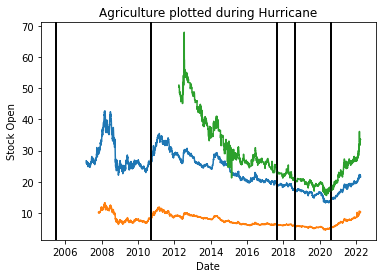

In [159]:
hurricane = hurricane_dis('Agriculture', 'Hurricane')
hurricane.data()
hurricane.plot()

In [160]:
hurricane.corr()

 Looking at the Agriculture industry and how it is affected by the natural disaster: Hurricane ,we analyzed 10 points
 where there was an average percentage change of -0.0010877509445322135 compared to the standard industry average of -0.0003579488394607514


,Open,High,Low,Close,Adj Close,Volume,% change
Open,1.000000,0.999903,0.999741,0.999441,0.998236,0.301641,-0.521682
High,0.999903,1.000000,0.999780,0.999658,0.998447,0.313451,-0.512245
Low,0.999741,0.999780,1.000000,0.999896,0.998964,0.309359,-0.504781
Close,0.999441,0.999658,0.999896,1.000000,0.998937,0.319219,-0.493848
Adj Close,0.998236,0.998447,0.998964,0.998937,1.000000,0.331937,-0.491653
Volume,0.301641,0.313451,0.309359,0.319219,0.331937,1.000000,0.368917
% change,-0.521682,-0.512245,-0.504781,-0.493848,-0.491653,0.368917,1.000000


 Looking at the Entertainment industry and how it is affected by the natural disaster: Snowstorm ,we analyzed 68 points
 where there was an average percentage change of -3.406107283834816e-05 compared to the standard industry average of -0.00022299670840516433


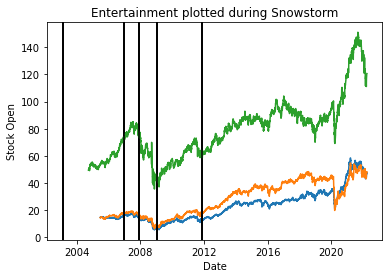

In [165]:
snowstorm = snowstorm_dis('Entertainment', 'Snowstorm')
snowstorm.data()
snowstorm.corr()
snowstorm.plot()

In [166]:
snowstorm.corr()

 Looking at the Entertainment industry and how it is affected by the natural disaster: Snowstorm ,we analyzed 68 points
 where there was an average percentage change of -3.406107283834816e-05 compared to the standard industry average of -0.00022299670840516433


,Open,High,Low,Close,Adj Close,Volume,% change
Open,1.000000,0.999892,0.999881,0.999689,0.999385,-0.219463,0.216172
High,0.999892,1.000000,0.999859,0.999889,0.999659,-0.219031,0.226023
Low,0.999881,0.999859,1.000000,0.999852,0.999563,-0.220612,0.226644
Close,0.999689,0.999889,0.999852,1.000000,0.999785,-0.220253,0.237124
Adj Close,0.999385,0.999659,0.999563,0.999785,1.000000,-0.219002,0.238690
Volume,-0.219463,-0.219031,-0.220612,-0.220253,-0.219002,1.000000,-0.035465
% change,0.216172,0.226023,0.226644,0.237124,0.238690,-0.035465,1.000000


### Function to Implement Classes

In [150]:
def f3(Industry, Natural_Disaster):
    """Function that calls the neccesary natural disaster class and returns the plotted industry with
    dates of input natural disaster type.
    
    Returns the correlation matrix and average percent change for the input industry against all of 
    the disasters of the input natural disaster type
    
    Basically, this function implements the classes."""
    
    if Natural_Disaster == "Hurricane":
        hurricane = hurricane_dis(Industry, Natural_Disaster)
        hurricane.data()
        corr = hurricane.corr()
        plot = hurricane.plot()
    elif Natural_Disaster == "Tornado":
        tornado = tornado_dis(Industry, Natural_Disaster)
        tornado.data()
        corr = tornado.corr()
        plot = tornado.plot()
    elif Natural_Disaster == "Snowstorm":
        snowstorm = snowstorm_dis(Industry, Natural_Disaster)
        snowstorm.data()
        corr = snowstorm.corr()
        plot = snowstorm.plot()
    print(corr)
    return plot

### Results and Test Code

    Industry options: 
        
        'Pharmaceutical',
        'Real Estate',
        'Energy',
        'Materials',
        'Entertainment',
        'Healthcare',
        'Manufacturing',
        'Mining',
        'Tech',
        'Agriculture',
        'Automotive',
        'Telecommunications'
        
    Natural Disaster Options:
        
        'Tornado',
        'Hurricane',
        'Snowstorm'
        
    call f3(Industry Option, Natural Disaster Option)

 Looking at the Entertainment industry and how it is affected by the natural disaster: Snowstorm ,we analyzed 68 points
 where there was an average percentage change of -3.406107283834816e-05 compared to the standard industry average of -0.00022299670840516433
               Open      High       Low     Close  Adj Close    Volume  \
Open       1.000000  0.999892  0.999881  0.999689   0.999385 -0.219463   
High       0.999892  1.000000  0.999859  0.999889   0.999659 -0.219031   
Low        0.999881  0.999859  1.000000  0.999852   0.999563 -0.220612   
Close      0.999689  0.999889  0.999852  1.000000   0.999785 -0.220253   
Adj Close  0.999385  0.999659  0.999563  0.999785   1.000000 -0.219002   
Volume    -0.219463 -0.219031 -0.220612 -0.220253  -0.219002  1.000000   
% change   0.216172  0.226023  0.226644  0.237124   0.238690 -0.035465   

           % change  
Open       0.216172  
High       0.226023  
Low        0.226644  
Close      0.237124  
Adj Close  0.238690  
Volume    -0.0

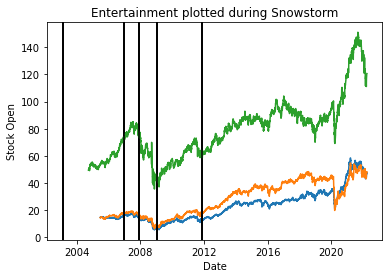

In [172]:
f3('Entertainment', 'Snowstorm')

 Looking at the Mining industry and how it is affected by the natural disaster: Tornado ,we analyzed 10 points
 where there was an average percentage change of 0.001311581927394037
               Open      High       Low     Close  Adj Close    Volume  \
Open       1.000000  0.999621  0.999630  0.998973   0.977894  0.658601   
High       0.999621  1.000000  0.999735  0.999760   0.979988  0.648385   
Low        0.999630  0.999735  1.000000  0.999549   0.976455  0.641679   
Close      0.998973  0.999760  0.999549  1.000000   0.979951  0.634786   
Adj Close  0.977894  0.979988  0.976455  0.979951   1.000000  0.640445   
Volume     0.658601  0.648385  0.641679  0.634786   0.640445  1.000000   
% change  -0.282641 -0.256738 -0.265487 -0.240778  -0.203479 -0.536908   

           % change  
Open      -0.282641  
High      -0.256738  
Low       -0.265487  
Close     -0.240778  
Adj Close -0.203479  
Volume    -0.536908  
% change   1.000000  


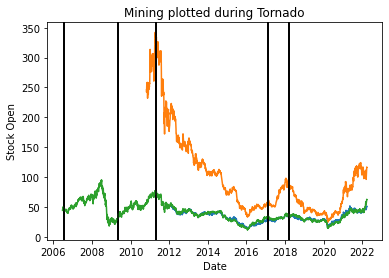

In [124]:
f3('Mining', 'Tornado')

 Looking at the Agriculture industry and how it is affected by the natural disaster: Hurricane ,we analyzed 10 points
 where there was an average percentage change of -0.0010877509445322135 compared to the standard industry average of -0.0003579488394607514
               Open      High       Low     Close  Adj Close    Volume  \
Open       1.000000  0.999903  0.999741  0.999441   0.998236  0.301641   
High       0.999903  1.000000  0.999780  0.999658   0.998447  0.313451   
Low        0.999741  0.999780  1.000000  0.999896   0.998964  0.309359   
Close      0.999441  0.999658  0.999896  1.000000   0.998937  0.319219   
Adj Close  0.998236  0.998447  0.998964  0.998937   1.000000  0.331937   
Volume     0.301641  0.313451  0.309359  0.319219   0.331937  1.000000   
% change  -0.521682 -0.512245 -0.504781 -0.493848  -0.491653  0.368917   

           % change  
Open      -0.521682  
High      -0.512245  
Low       -0.504781  
Close     -0.493848  
Adj Close -0.491653  
Volume     0.3689

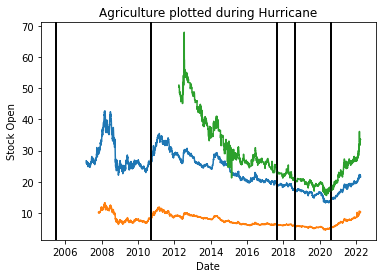

In [171]:
f3('Agriculture', 'Hurricane')

 Looking at the Agriculture industry and how it is affected by the natural disaster: Hurricane ,we analyzed 10 points
 where there was an average percentage change of -0.0010877509445322135 compared to the standard industry average of -0.0003579488394607514
               Open      High       Low     Close  Adj Close    Volume  \
Open       1.000000  0.999903  0.999741  0.999441   0.998236  0.301641   
High       0.999903  1.000000  0.999780  0.999658   0.998447  0.313451   
Low        0.999741  0.999780  1.000000  0.999896   0.998964  0.309359   
Close      0.999441  0.999658  0.999896  1.000000   0.998937  0.319219   
Adj Close  0.998236  0.998447  0.998964  0.998937   1.000000  0.331937   
Volume     0.301641  0.313451  0.309359  0.319219   0.331937  1.000000   
% change  -0.521682 -0.512245 -0.504781 -0.493848  -0.491653  0.368917   

           % change  
Open      -0.521682  
High      -0.512245  
Low       -0.504781  
Close     -0.493848  
Adj Close -0.491653  
Volume     0.3689

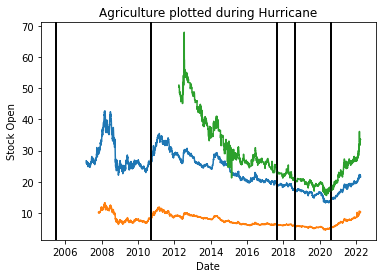

In [175]:
f3('Agriculture', 'Hurricane')

### Conclusions

 - Natural Disasters have very miniscule effects on the stock market
 - The ETF data collected typically has around 2,000+ days, while there were only about 100 dates for each natural disaster 
 - The average % change calculated amongst natural disaster days was very similar to average % change on every other day